In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# разбиваем цены на данные классы
classes =  [(0, 12000),
           (12000, 46000)]

dataset = pd.read_csv('car19.csv')
price = dataset[['price']]
categories = []
breakFlag = False
for _, x in price.iterrows():
    for i, c in enumerate(classes):

        if c[0] <= x['price'] < c[1]:
            categories.append(i)
            breakFlag = True
            break

    if breakFlag:
        continue
dataset['Категория'] = categories


In [32]:
dataset = dataset.drop(columns=['symboling'])

In [33]:
dataset.head(100)

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Категория
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.6,1
1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.1,1
2,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.7,1
3,3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.2,1
4,4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,103,100.4,184.6,66.5,55.1,3060,181,3.43,3.27,9.0,152,5200,19,25,13499.7,1
96,104,91.3,170.7,67.9,49.7,3071,181,3.43,3.27,9.0,160,5200,19,25,17199.7,1
97,105,91.3,170.7,67.9,49.7,3139,181,3.43,3.27,7.8,200,5200,17,23,19699.7,1
98,106,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160,5200,19,25,18399.7,1


In [34]:
x_y = dataset[['compressionratio', 'price']]

In [35]:
new_ind = np.arange(100)
np.random.shuffle(new_ind)
new_ind #

array([40, 93,  8, 74, 60, 81, 71, 84, 94, 48, 70,  0, 64, 33, 16, 90, 36,
       11, 52, 97, 72, 75, 69, 25, 37, 78, 62,  4, 92, 82,  5, 44,  2, 79,
       73, 54, 31, 34, 49, 18, 10, 80, 83, 65, 96, 89, 50,  1, 51,  7, 46,
       32, 55, 85,  6, 12, 45, 91, 53, 68, 26, 99, 88, 67, 19, 58, 47, 43,
       98, 28, 95, 21, 86, 87, 41,  3, 23, 27, 35, 14, 24, 59, 29, 38, 30,
       57, 61, 17, 42, 20, 76, 66, 77, 13, 63, 15, 22, 39, 56,  9])

In [36]:
train_idx = new_ind[:70]# первую часть индексов (с 0 до 69) определим как обучающие
test_idx = new_ind[70:]# вторую часть индексов (с 70 до конца=99) определим как тестовые
x_y_train = x_y.iloc[train_idx]
# используя эти индексы разделим массивы данных на обучающие и тестовые
x_train, y_train = x_y_train['compressionratio'], x_y_train['price']# обучающие вход и желаемый выход
x_test, y_test = x_y['compressionratio'][test_idx], x_y['price'][test_idx]# тестовые вход и желаемый выход

In [37]:
#Линейная регрессия

In [38]:
a =  np.random.randn(1)# случайное число для параметра a
a

array([-0.72367182])

In [39]:
b = np.random.rand(1)# случайное число для параметра b 
b

array([0.83352327])

In [40]:
#Линейная регрессия
lr = 10e-3 # шаг обучения
epochs = 100 # количество эпох

In [41]:
# ЦИКЛ ОБУЧЕНИЯ
Loss=[]# массив для значений функции ошибки
for ep in range(epochs): # в цикле по количеству эпох
    y_pred = b + a*x_train # считаем выход модели для всех примеров входов с текущими значениями параметров модели
    error = (y_pred - y_train) # считаем разницу между полученным выходом и тем, который должен был быть
    
    loss = (error**2).mean() # считаем суммарную ошибку. Функция среднего mean() как замена суммирования по всем примерам 
    Loss.append(loss) # добавлем текущее значение в массив
    b_grad = 2 * error.mean() # считаем производную по параметру, смещению b (на 2 можно не умножать включив его в lr)
    a_grad = 2 * (x_train * error).mean() # считаем производную по параметру, множителю a
    
    # обучение = изменение параметров
    a = a - lr*a_grad # изменяем параметр a
    b = b - lr*b_grad # изменяем параметр b      
    
    if ep % 20 == 0 or ep==epochs-1: # каждые 20 эпох будем
        print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(ep,loss,a,b)) # печатать значение функции ошибки

ep:   0  loss: 221777362.825172   a=2226.098  b=253.285
ep:  20  loss: 73070589.142397   a=1287.100  b=414.747
ep:  40  loss: 72739315.898189   a=1259.035  b=670.452
ep:  60  loss: 72417190.193250   a=1231.936  b=922.687
ep:  80  loss: 72103901.262727   a=1205.211  b=1171.439
ep:  99  loss: 71814240.968892   a=1180.165  b=1404.569


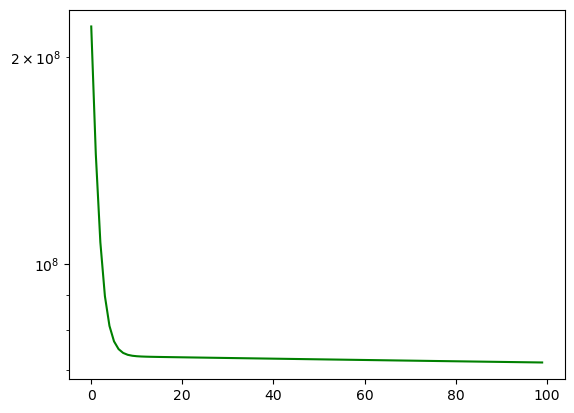

In [42]:
from matplotlib import pyplot as plt  #
plt.plot(np.arange(epochs), Loss, color='green') # рисуем
plt.yscale('log') # логарифмический масштаб для наглядности

In [43]:
y_test_pred = b + a*x_test # рассчитаем выходы модели на тестовых примерах входов
#у нас уже были соответствующие желаемые тестовые выходы для них в y_test
y_test_pred

95    12026.053887
21    10373.822973
86    12498.119863
87    12498.119863
41    11435.971418
3     13206.218826
23    12498.119863
27     9665.724010
35    12026.053887
14    12026.053887
24    12498.119863
59    11553.987912
29    12262.086875
38    12026.053887
30    13324.235319
57    11553.987912
61    11553.987912
17    12734.152850
42    12734.152850
20    12498.119863
76     9665.724010
66    10845.888949
77    11435.971418
13    12026.053887
63    26778.115617
15    10845.888949
22    12498.119863
39    12026.053887
56    12498.119863
9      9665.724010
Name: compressionratio, dtype: float64

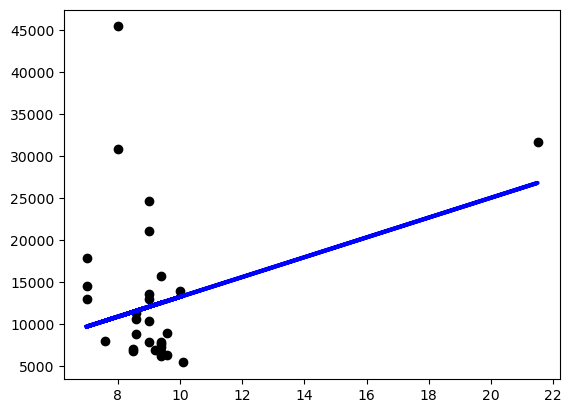

In [44]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)
plt.show()

In [45]:
#Логистическая регрессия

In [52]:
df= dataset.drop(columns=['car_ID'])

In [53]:
df.head(150)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Категория
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.6,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.1,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.7,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.2,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,98.4,176.2,65.6,52.0,2679,146,3.62,3.50,9.3,116,4800,24,30,11199.2,0
146,98.4,176.2,65.6,52.0,2714,146,3.62,3.50,9.3,116,4800,24,30,11549.2,0
147,98.4,176.2,65.6,53.0,2975,146,3.62,3.50,9.3,116,4800,24,30,17669.2,1
148,102.4,175.6,66.5,54.9,2326,122,3.31,3.54,8.7,92,4200,29,34,8948.2,0


In [55]:
X=df.iloc[:,:14]
y=df.iloc[:,14]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

In [48]:
from sklearn.linear_model import LinearRegression

lin_clf = LinearRegression()

lin_clf.fit(X_train, y_train) #обучение

print(f'Обученные параметры: \nСмещение b={lin_clf.intercept_:6.4f} ')
print('Множители a= ',lin_clf.coef_)

Обученные параметры: 
Смещение b=0.8685 
Множители a=  [-2.41160313e-02  1.13513627e-02  7.30598418e-03 -8.46891878e-03
  5.24305350e-04 -9.52632776e-03 -2.66483714e-01 -1.44723283e-02
  4.43755779e-04  4.24232342e-03 -5.32161139e-05  4.45295535e-02
 -4.05044888e-02  5.14212141e-05]


In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
y_scor=model.fit(X_train, y_train)
y_score=y_scor.predict(X_test)

In [50]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
print(metrics.classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.90      0.96      0.93        28

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



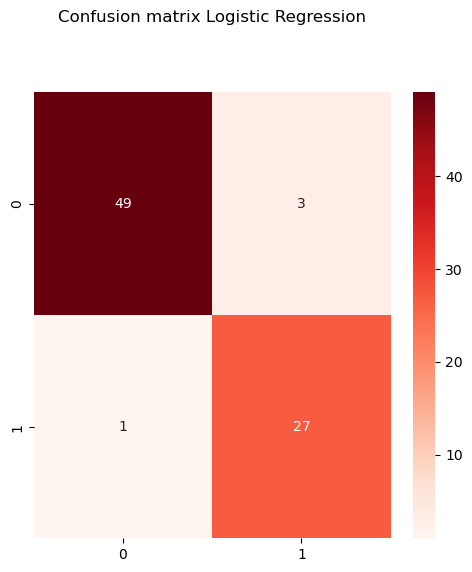

In [51]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)
plt.show()

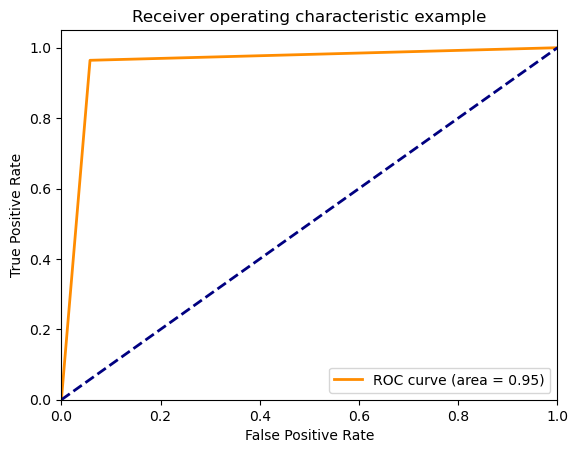

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [23]:
X_cut = X.iloc[:,2:14]
X_cut

,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.6
1,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.1
2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.7
3,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.2
4,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.8
...,...,...,...,...,...,...,...,...,...,...,...,...
154,66.5,54.1,3131,171,3.27,3.35,9.2,156,5200,20,24,15690.3
155,66.5,54.1,3151,161,3.27,3.35,9.2,156,5200,19,24,15750.5
156,65.5,55.7,2209,109,3.19,3.40,9.0,85,5250,27,34,7975.5
157,64.2,55.6,2254,109,3.19,3.40,8.5,90,5500,24,29,11595.5


In [24]:
X = X.iloc[:,2:14]
X

,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.6
1,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.1
2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.7
3,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.2
4,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.8
...,...,...,...,...,...,...,...,...,...,...,...,...
154,66.5,54.1,3131,171,3.27,3.35,9.2,156,5200,20,24,15690.3
155,66.5,54.1,3151,161,3.27,3.35,9.2,156,5200,19,24,15750.5
156,65.5,55.7,2209,109,3.19,3.40,9.0,85,5250,27,34,7975.5
157,64.2,55.6,2254,109,3.19,3.40,8.5,90,5500,24,29,11595.5


In [25]:
X_cut = X.iloc[:, [0, 4, 2, 7]]
X_cut

,carwidth,boreratio,curbweight,horsepower
0,64.1,3.47,2548,111
1,64.1,3.47,2548,111
2,65.5,2.68,2823,154
3,66.2,3.19,2337,102
4,66.4,3.19,2824,115
...,...,...,...,...
154,66.5,3.27,3131,156
155,66.5,3.27,3151,156
156,65.5,3.19,2209,85
157,64.2,3.19,2254,90


In [26]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cut, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

In [27]:
#настройка параметров модели
model = LogisticRegression()
yc_scor=model.fit(Xc_train, yc_train)
yc_score=yc_scor.predict(Xc_test)

In [28]:
print(metrics.classification_report(yc_test, yc_score))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        52
           1       0.77      0.96      0.86        28

    accuracy                           0.89        80
   macro avg       0.87      0.91      0.88        80
weighted avg       0.91      0.89      0.89        80



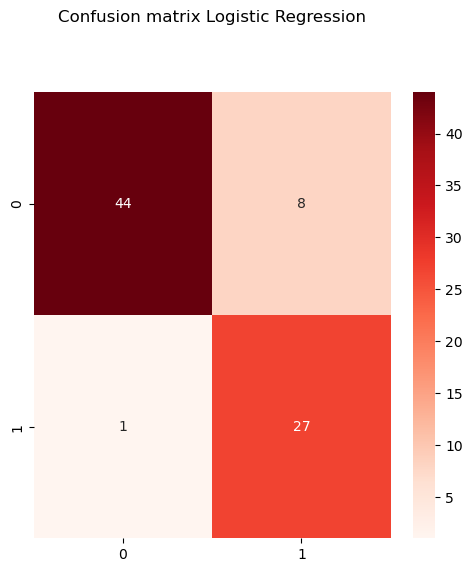

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(yc_test, yc_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)
plt.show()

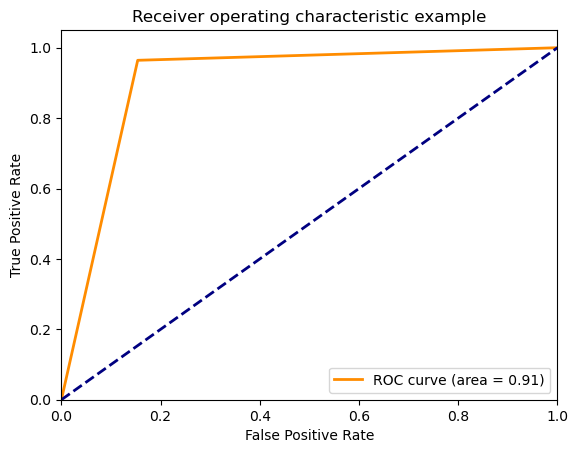

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(yc_test, yc_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()